In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

<span style="color:blue; font-weight:500">Loading Dataset</span>

In [4]:
path = r'C:\Users\User\Desktop\Ironhack_DA\ML-Project-Predicting-Life-Expectancy\Life Expectancy Data.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


Columns description:

- Country
- Year
- Status: Developed or Developing status
- Life expectancy: Life Expectancy in age
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- HIV/AIDs Deaths per 1000 live births HIV/AIDS (0-4 years)
- Measles: Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population

In [8]:
list(df.iloc[0].items())

[('Country', 'Afghanistan'),
 ('Year', 2015),
 ('Status', 'Developing'),
 ('Life expectancy ', 65.0),
 ('Adult Mortality', 263.0),
 ('infant deaths', 62),
 ('Alcohol', 0.01),
 ('percentage expenditure', 71.27962362),
 ('Hepatitis B', 65.0),
 ('Measles ', 1154),
 (' BMI ', 19.1),
 ('under-five deaths ', 83),
 ('Polio', 6.0),
 ('Total expenditure', 8.16),
 ('Diphtheria ', 65.0),
 (' HIV/AIDS', 0.1),
 ('GDP', 584.25921),
 ('Population', 33736494.0),
 (' thinness  1-19 years', 17.2),
 (' thinness 5-9 years', 17.3),
 ('Income composition of resources', 0.479),
 ('Schooling', 10.1)]

In [9]:
df.shape

(2938, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<span style="color:blue; font-weight:500">Fixing formats</span>

In [12]:
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [13]:
df.columns.tolist()

['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under-five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'population',
 'thinness_1-19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling']

<span style="color:blue; font-weight:500">Formatting Data as Percentages (%)</span>

In [27]:
df[['adult_mortality', 'infant_deaths', 'measles','hiv/aids']] = df[['adult_mortality', 'infant_deaths', 'measles','hiv/aids']] / 1000

In [29]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,0.263,0.062,0.01,71.279624,65.0,1.154,...,6.0,8.16,65.0,0.0001,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,0.271,0.064,0.01,73.523582,62.0,0.492,...,58.0,8.18,62.0,0.0001,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,0.268,0.066,0.01,73.219243,64.0,0.430,...,62.0,8.13,64.0,0.0001,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,0.272,0.069,0.01,78.184215,67.0,2.787,...,67.0,8.52,67.0,0.0001,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,0.275,0.071,0.01,7.097109,68.0,3.013,...,68.0,7.87,68.0,0.0001,63.537231,2978599.0,18.2,18.2,0.454,9.5


<span style="color:blue; font-weight:500">Handling missing values</span>

In [32]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [34]:
#dropping column not relevent
df = df.drop(columns=['population','thinness_1-19_years','thinness_5-9_years','income_composition_of_resources','schooling'])

In [36]:
#dropping rows with Null value
df = df.dropna(subset=["life_expectancy",'hepatitis_b', 'diphtheria','alcohol'])

In [38]:
df.isnull().sum()

country                     0
year                        0
status                      0
life_expectancy             0
adult_mortality             0
infant_deaths               0
alcohol                     0
percentage_expenditure      0
hepatitis_b                 0
measles                     0
bmi                        10
under-five_deaths           0
polio                       0
total_expenditure          19
diphtheria                  0
hiv/aids                    0
gdp                       338
dtype: int64

In [40]:
df['gdp'] = df['gdp'].fillna(df.groupby('country')['gdp'].transform('mean'))
df['bmi'] = df['bmi'].fillna(df.groupby('country')['bmi'].transform('mean'))
df['total_expenditure'] = df['total_expenditure'].fillna(df.groupby('country')['total_expenditure'].transform('mean'))

In [42]:
df.isnull().sum()

country                     0
year                        0
status                      0
life_expectancy             0
adult_mortality             0
infant_deaths               0
alcohol                     0
percentage_expenditure      0
hepatitis_b                 0
measles                     0
bmi                        10
under-five_deaths           0
polio                       0
total_expenditure          14
diphtheria                  0
hiv/aids                    0
gdp                       321
dtype: int64

In [44]:
# dropping the rest null values, countries without a GDP value OR total_expenditure
df = df.dropna(subset=['gdp','bmi','total_expenditure'])

In [46]:
df.isnull().sum()

country                   0
year                      0
status                    0
life_expectancy           0
adult_mortality           0
infant_deaths             0
alcohol                   0
percentage_expenditure    0
hepatitis_b               0
measles                   0
bmi                       0
under-five_deaths         0
polio                     0
total_expenditure         0
diphtheria                0
hiv/aids                  0
gdp                       0
dtype: int64

In [48]:
df.shape

(1872, 17)

<span style="color:blue; font-weight:500">EDA</span>

In [51]:
df.head(3)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp
0,Afghanistan,2015,Developing,65.0,0.263,0.062,0.01,71.279624,65.0,1.154,19.1,83,6.0,8.16,65.0,0.0001,584.259210
1,Afghanistan,2014,Developing,59.9,0.271,0.064,0.01,73.523582,62.0,0.492,18.6,86,58.0,8.18,62.0,0.0001,612.696514
2,Afghanistan,2013,Developing,59.9,0.268,0.066,0.01,73.219243,64.0,0.430,18.1,89,62.0,8.13,64.0,0.0001,631.744976


In [53]:
#Exploring the data in a single view
columns = [
    'country', 'year', 'status', 'life_expectancy', 'adult_mortality',
    'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
    'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
    'diphtheria', 'hiv/aids', 'gdp'
]

for col in columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: country
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'France' 'Gabon' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'India' 'Indonesia' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Mali' 'Malta' 'Mauritania'
 'Mauritius

In [55]:
df['country'].value_counts()

country
Afghanistan          16
Singapore            16
Albania              16
New Zealand          16
Indonesia            15
                     ..
Namibia               5
Sweden                4
Netherlands           4
Haiti                 2
Equatorial Guinea     1
Name: count, Length: 147, dtype: int64

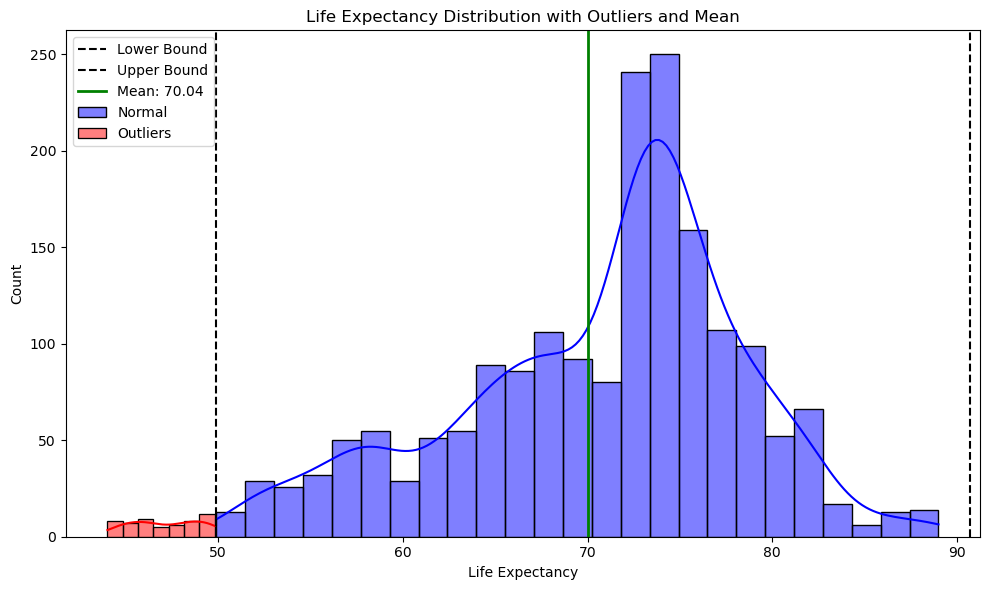

In [57]:
# Calculate IQR
Q1 = df['life_expectancy'].quantile(0.25)
Q3 = df['life_expectancy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['life_expectancy'] < lower_bound) | (df['life_expectancy'] > upper_bound)]
non_outliers = df[(df['life_expectancy'] >= lower_bound) & (df['life_expectancy'] <= upper_bound)]

# Calculate mean
mean_val = df['life_expectancy'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(non_outliers['life_expectancy'], kde=True, color='blue', label='Normal')
sns.histplot(outliers['life_expectancy'], kde=True, color='red', label='Outliers')

# Add bounds and mean lines
plt.axvline(lower_bound, color='black', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='black', linestyle='--', label='Upper Bound')
plt.axvline(mean_val, color='green', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.2f}')

# Final touches
plt.title('Life Expectancy Distribution with Outliers and Mean')
plt.xlabel('Life Expectancy')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
df[df['life_expectancy']<50].shape

(56, 17)

In [61]:
# df_1 = df[df['life_expectancy']>50] -> removed step as the model has lower R2 by removing the outliers

<span style="color:blue; font-weight:500">Distribution without the outliers</span>

In [64]:
# # Calculate IQR
# Q1 = df_1['life_expectancy'].quantile(0.25)
# Q3 = df_1['life_expectancy'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = df_1[(df_1['life_expectancy'] < lower_bound) | (df_1['life_expectancy'] > upper_bound)]
# non_outliers = df_1[(df_1['life_expectancy'] >= lower_bound) & (df_1['life_expectancy'] <= upper_bound)]

# # Calculate mean
# mean_val = df_1['life_expectancy'].mean()  # ← fixed this line

# # Plot
# plt.figure(figsize=(10, 6))
# sns.histplot(non_outliers['life_expectancy'], kde=True, color='blue', label='Normal')
# sns.histplot(outliers['life_expectancy'], kde=True, color='red', label='Outliers')

# # Add bounds and mean lines
# plt.axvline(lower_bound, color='black', linestyle='--', label='Lower Bound')
# plt.axvline(upper_bound, color='black', linestyle='--', label='Upper Bound')
# plt.axvline(mean_val, color='green', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.2f}')

# # Final touches
# plt.title('Life Expectancy Distribution with Outliers and Mean')
# plt.xlabel('Life Expectancy')
# plt.ylabel('Count')
# plt.legend()
# plt.tight_layout()
# plt.show()

<span style="color:blue; font-weight:500">Scaling & Feature Selection</span>

In [67]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp'],
      dtype='object')

In [69]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp
0,Afghanistan,2015,Developing,65.0,0.263,0.062,0.01,71.279624,65.0,1.154,19.1,83,6.0,8.16,65.0,0.0001,584.259210
1,Afghanistan,2014,Developing,59.9,0.271,0.064,0.01,73.523582,62.0,0.492,18.6,86,58.0,8.18,62.0,0.0001,612.696514
2,Afghanistan,2013,Developing,59.9,0.268,0.066,0.01,73.219243,64.0,0.430,18.1,89,62.0,8.13,64.0,0.0001,631.744976
3,Afghanistan,2012,Developing,59.5,0.272,0.069,0.01,78.184215,67.0,2.787,17.6,93,67.0,8.52,67.0,0.0001,669.959000
4,Afghanistan,2011,Developing,59.2,0.275,0.071,0.01,7.097109,68.0,3.013,17.2,97,68.0,7.87,68.0,0.0001,63.537231


In [71]:
features = df.drop(columns = ['country', 'year', 'status', 'life_expectancy'])
target = df["life_expectancy"]

In [73]:
features.columns.tolist()

['adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under-five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp']

<span style="color:blue; font-weight:500">Train Test Split</span>

In [76]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [78]:
scaler = RobustScaler() # uses the median and the interquartile range (IQR). This makes it less sensitive to extreme values.

In [80]:
scaler.fit(X_train)

RobustScaler()

In [82]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

(array([ 38.,  57., 100., 126., 216., 231., 637., 318., 116.,  33.]),
 array([44. , 48.5, 53. , 57.5, 62. , 66.5, 71. , 75.5, 80. , 84.5, 89. ]),
 <BarContainer object of 10 artists>)

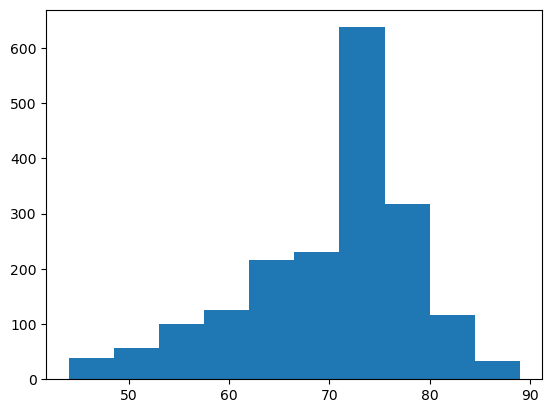

In [86]:
plt.hist(df['life_expectancy'])

In [88]:
# plt.hist(np.log1p(df['life_expectancy']))

In [90]:
X_train_scaled.head()

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp
0,-0.034965,0.000000,-0.488789,-0.298724,0.315789,1.080702,0.478754,-0.047619,0.357143,-0.440129,0.357143,0.00,0.532663
1,0.552448,3.294118,-0.451420,-0.297739,-0.368421,3.775439,-0.773371,3.571429,-0.642857,-1.288026,-0.500000,1.25,-0.348121
2,0.531469,0.352941,-0.488789,-0.283215,-1.473684,4.491228,-0.495751,0.428571,-2.928571,-0.770227,-2.071429,2.75,-0.332283
3,-0.433566,-0.117647,0.883408,0.827012,-0.210526,0.045614,0.518414,-0.142857,-0.357143,0.870550,-0.357143,0.00,0.273953
4,0.825175,0.764706,1.161435,0.003563,0.263158,0.410526,0.356941,0.666667,0.357143,0.378641,0.285714,0.25,-0.032368


In [92]:
X_test_scaled.head()

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp
0,-0.538462,-0.058824,0.907324,7.602979,0.210526,4.182456,0.563739,-0.047619,0.285714,1.207120,0.285714,0.0,5.164777
1,-0.286713,-0.117647,0.219731,0.898886,-4.368421,0.035088,0.218130,-0.142857,-6.000000,1.288026,-6.000000,0.0,0.551941
2,-0.377622,-0.058824,-0.231689,0.244179,0.052632,-0.042105,0.288952,-0.095238,0.071429,-0.375405,0.000000,0.0,0.295765
3,-0.041958,-0.058824,0.106129,-0.215967,-0.368421,-0.038596,0.135977,-0.095238,-6.000000,-0.436893,-0.357143,0.0,0.250594
4,-0.951049,21.294118,-0.484305,-0.241921,-4.473684,10.417544,-0.736544,21.714286,-1.071429,-0.889968,-1.142857,0.0,-0.218610


<span style="color:blue; font-weight:500">Different models</span>

<span style="color:blue; font-weight:500">1 - Linear Regression</span>

In [96]:
lin_reg = LinearRegression()

In [98]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [107]:
pred = lin_reg.predict(X_test_scaled)

print("MSE", mean_squared_error(pred, y_test))
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(y_test, pred))
print("R2 score", lin_reg.score(X_test_scaled, y_test))

MSE 16.0688505929934
MAE 3.129035440719227
RMSE 4.008597085389526
R2 score 0.7863110129049465


!! My R2 score dropped around 6% by removing the outliers !!

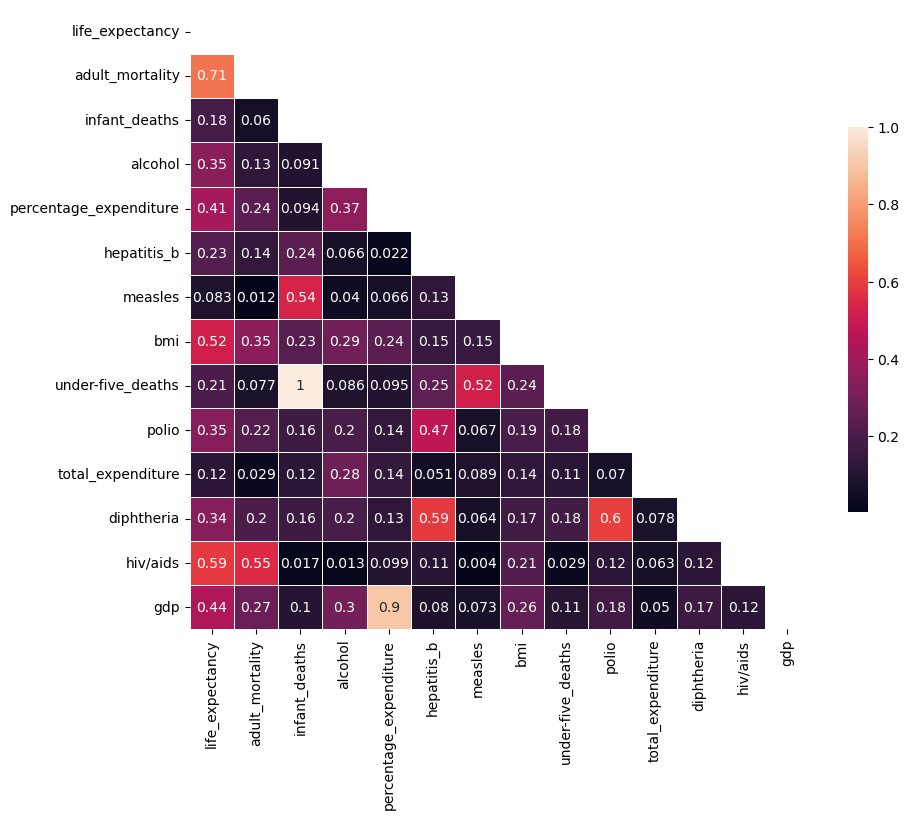

In [110]:
corr=np.abs(df.drop(columns = ['country', 'year', 'status']).corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

Low correlation to target variable to be removed: "measles","total_expendidure"

High correlation between themselves to be removed: 'infant_deaths','percentage_expenditure'

In [113]:
X_train_scaled = X_train_scaled.drop(columns = ['measles','total_expenditure'])
X_test_scaled = X_test_scaled.drop(columns = ['measles','total_expenditure'])

In [115]:
X_train_scaled = X_train_scaled.drop(columns = ['infant_deaths','percentage_expenditure'])
X_test_scaled = X_test_scaled.drop(columns = ['infant_deaths','percentage_expenditure'])

In [117]:
lin_reg = LinearRegression()

In [119]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [123]:
pred = lin_reg.predict(X_test_scaled)

print("MSE", mean_squared_error(pred, y_test))
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", lin_reg.score(X_test_scaled, y_test))

MSE 16.529665200632312
MAE 3.1425667020490073
RMSE 4.0656690963028845
R2 score 0.7801829450524829


! The performance slightly increased by removed the less correlated columns,
but dropped by removing the highly correlated between themselves 'infant_deaths','percentage_expenditure'

In [126]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train_scaled.columns, lin_reg.coef_)}
lin_reg_coef

{'adult_mortality': -3.5869594231985316,
 'alcohol': 2.345067569575341,
 'hepatitis_b': -0.16750183840361735,
 'bmi': 2.8360970117100055,
 'under-five_deaths': -0.0843696349435772,
 'polio': 0.3858514088025381,
 'diphtheria': 0.545463117043529,
 'hiv/aids': -0.20095759006094963,
 'gdp': 0.5982893928531713}

Surprisingly hiv/aids & hepatitis_b immunization has a negative impact on life expectancy. By removing these two features the R2 drops by almost 6%.

<span style="color:blue; font-weight:500">2 - Random Forest</span>

In [130]:
forest = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [132]:
forest.fit(X_train_scaled, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [134]:
pred = forest.predict(X_test_scaled)

print("MSE", mean_squared_error(pred, y_test))
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", forest.score(X_test_scaled, y_test))

MSE 3.43616551466667
MAE 1.1762026666666678
RMSE 1.8536897029078707
R2 score 0.9543047137024074


<span style="color:blue; font-weight:500">3 - Adaptive boosting</span>

!!Initially, the approach was to use a random forest within adaboosting,
which probably was causing overfitting because the performance was 6% higher. Also max depth was changed to 4 instead of 20.

In [138]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4,random_state=42),
                            n_estimators=100,
                            learning_rate=0.1,
                            random_state=42)

In [140]:
ada_reg.fit(X_train_scaled, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4, random_state=42),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [142]:
pred = ada_reg.predict(X_test_scaled)

print("MSE", mean_squared_error(pred, y_test))
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test)) # -> this should be similar to MAE
print("R2 score", ada_reg.score(X_test_scaled, y_test))

MSE 7.794661164843496
MAE 2.0992809374886323
RMSE 2.791892040327401
R2 score 0.8963439706265716


<span style="color:blue; font-weight:500">4 - GradientBoosting</span>

In [145]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100,
                                  learning_rate=0.1)

In [147]:
gb_reg.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=20)

In [149]:
pred = gb_reg.predict(X_test_scaled)

print("MSE", mean_squared_error(pred, y_test))
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", gb_reg.score(X_test_scaled, y_test))

MSE 6.658679649470656
MAE 1.613113050089557
RMSE 2.580441754713843
R2 score 0.9114506354109572


<span style="color:blue; font-weight:500">5 - Bagging and Pasting</span>

In [152]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [154]:
bagging_reg.fit(X_train_scaled, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [156]:
pred = bagging_reg.predict(X_test_scaled)

print("MSE", mean_squared_error(pred, y_test))
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", bagging_reg.score(X_test_scaled, y_test))

MSE 3.824912126901602
MAE 1.2850925040949257
RMSE 1.9557382562351235
R2 score 0.9491350303249705


<span style="color:blue; font-weight:500">Comparing performance</span>

In [159]:
models = {
    'Linear Regression': lin_reg,
    'Random Forest': forest,
    'AdaBoost': ada_reg,
    'Gradient Boosting': gb_reg,
    'Bagging and Pasting': bagging_reg
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)  # Use the new function
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'R² Score': round(r2, 3),
        'MSE': round(mse, 3),
        'MAE': round(mae, 3),
        'RMSE': round(rmse, 3)
    })

results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)

results_df.style.set_caption("Model Performance Comparison (Test Set)") \
    .format({'R² Score': '{:.3f}', 'MSE': '{:.3f}', 'MAE': '{:.3f}', 'RMSE': '{:.3f}'}) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'black'),
                  ('font-size', '13px'),
                  ('text-align', 'center'),
                  ('font-weight', 'bold')]
    }])

,Model,R² Score,MSE,MAE,RMSE
1,Random Forest,0.954,3.436,1.176,1.854
4,Bagging and Pasting,0.949,3.825,1.285,1.956
3,Gradient Boosting,0.911,6.659,1.613,2.580
2,AdaBoost,0.896,7.795,2.099,2.792
0,Linear Regression,0.780,16.530,3.143,4.066


RF achieves the best metric scores compared to the other models

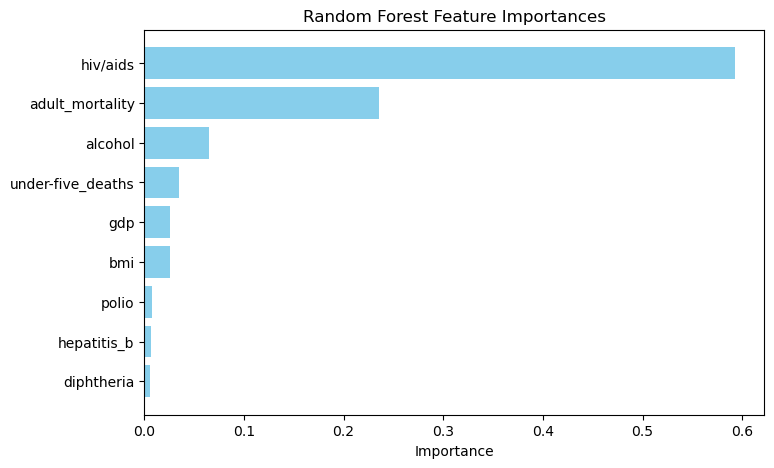

In [162]:
importances = forest.feature_importances_

feature_names = X_train_scaled.columns  # or list of your feature names

# Create a DataFrame for easier plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.show()

<span style="color:blue; font-weight:500">Fine-tuning RF</span>

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [167]:
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Max depth of trees; None means unlimited depth; too high can increase overfitting
    'max_features': [None, 'sqrt', 'log2'],    # Number of features to consider at each split
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]              # Minimum samples required to be at a leaf node
}

In [169]:
grid_search = GridSearchCV(
              estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
              param_grid=param_grid,
              cv=5,
              scoring='r2',
              n_jobs=-1,
              verbose=2) # Controls the verbosity: the higher, the more messages

In [171]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [174]:
best_forest_par = grid_search.best_estimator_

In [176]:
best_forest_par

RandomForestRegressor(max_features=None, n_estimators=300, n_jobs=-1,
                      random_state=42)

<span style="color:blue; font-weight:500">Validating model</span>

<span style="color:blue; font-weight:500">Cross-validation on best model</span>

In [246]:
from sklearn.model_selection import cross_validate

In [248]:
cv_results = cross_validate(
    best_forest_par,
    X_train_scaled,
    y_train,
    cv=5,
    scoring=['r2', 'neg_mean_squared_error'],
    return_train_score=False,
    n_jobs=-1
)

# Extract R² and MSE (convert MSE to positive)
r2_scores = cv_results['test_r2']
mse_scores = -cv_results['test_neg_mean_squared_error']

print("R² scores (per fold):", r2_scores)
print("Mean R² score:", np.mean(r2_scores))

print("MSE scores (per fold):", mse_scores)
print("Mean MSE:", np.mean(mse_scores)) # change to MAE

R² scores (per fold): [0.93902878 0.93654873 0.94097692 0.94993569 0.94730858]
Mean R² score: 0.9427597413381669
MSE scores (per fold): [4.73291838 4.61000399 4.68434475 3.20086077 3.82470377]
Mean MSE: 4.210566331005094


| Fold | R² Score | MSE   |
|------|----------|--------|
| 1    | 0.939    | 4.733  |
| 2    | 0.937    | 4.610  |
| 3    | 0.941    | 4.684  |
| 4    | 0.950    | 3.201  |
| 5    | 0.947    | 3.825  |
| **Mean** | **0.943** | **4.211** |

In [249]:
round(4.73291838 - 3.82470377,5)

0.90821

High mean R² (0.94) - the model fits well.

The scores across folds are close (range approx 0.936 to 0.950), consistent low variance between different subsets of data.

Comparing RF single test-split VS Cross-validation

<p style="color: red; font-weight: bold;">Check with teachers</p>

| Metric |   RF     | Cross-Validation |
|--------|----------|------------------|
| R²     | 0.954    | 0.943            |
| MSE    | 3.44     | 4.21             |

<span style="color:blue; font-weight:500">Overfitting/underfitting</span>

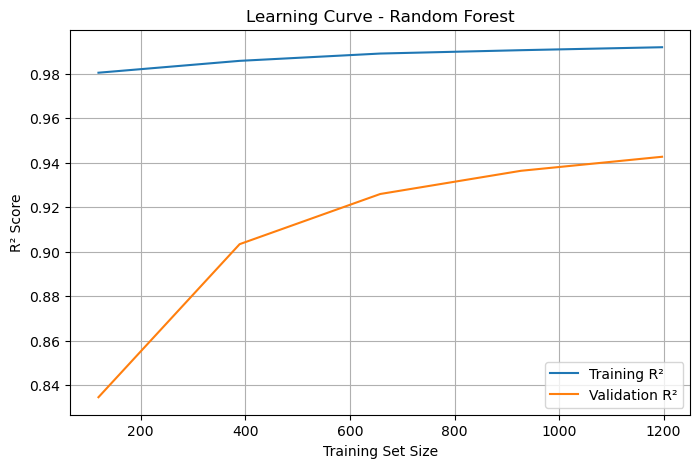

In [186]:
train_sizes, train_scores, val_scores = learning_curve(
    best_forest_par, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label='Training R²')
plt.plot(train_sizes, val_mean, label='Validation R²')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

A small gap between Training and Validation scores is normal,
because training data naturally allows the model to perform better than unseen validation data.

In [253]:
print(len(train_sizes))

5


<span style="color:blue; font-weight:500">Residual analysis</span>

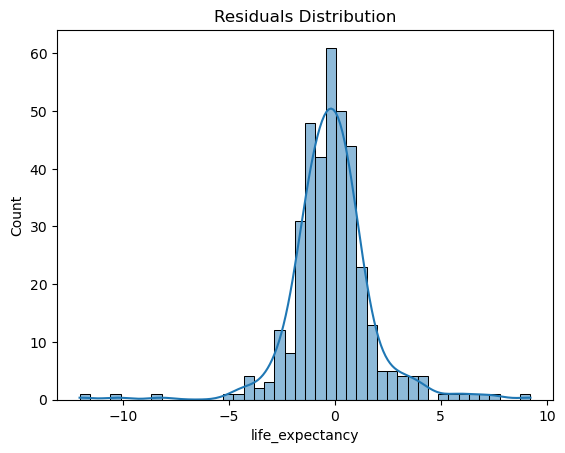

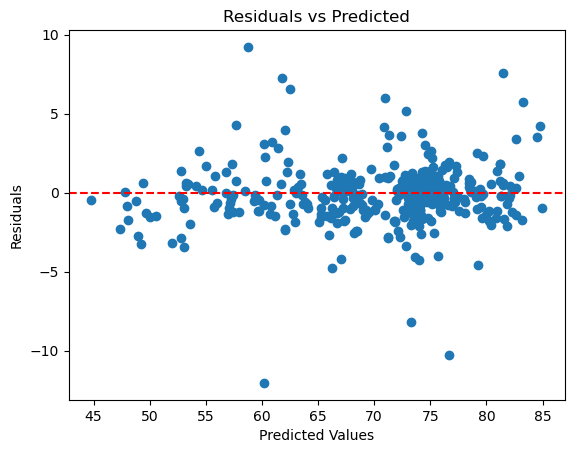

In [203]:
residuals = y_test - y_pred

# Plot residuals distribution
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Plot residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

In [205]:
print(f"Residual Mean: {residuals.mean():.4f}")
print(f"Residual Std Dev: {residuals.std():.4f}")

Residual Mean: -0.1428
Residual Std Dev: 1.9531


<span style="color:blue; font-weight:500">Performance based on best parameters</span>

In [207]:
best_rf = RandomForestRegressor(max_features=None, n_estimators=300, n_jobs=-1, random_state=42)

best_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features=None, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [209]:
y_pred = best_rf.predict(X_test_scaled)

In [211]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")

R² Score: 0.954
MSE: 3.442
MAE: 1.180


In [213]:
feature_importances = best_rf.feature_importances_

# Create DataFrame for better visualization
features_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Print top features
print(features_df.head(10))

             Feature  Importance
7           hiv/aids    0.588982
0    adult_mortality    0.241888
1            alcohol    0.065302
4  under-five_deaths    0.034072
8                gdp    0.025489
3                bmi    0.024377
5              polio    0.007345
2        hepatitis_b    0.006697
6         diphtheria    0.005849


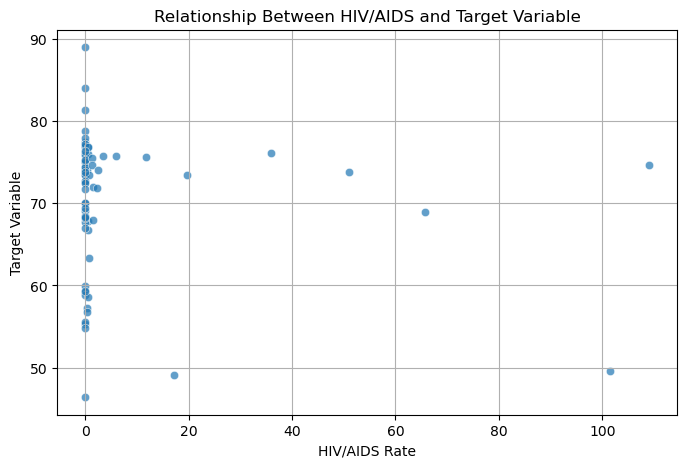

In [215]:
hiv_aids = X_test_scaled['hiv/aids']  # Or use X_train_scaled if needed
target = y_test  # Target variable

# Create scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=hiv_aids, y=target, alpha=0.7)

# Plot formatting
plt.xlabel("HIV/AIDS Rate")
plt.ylabel("Target Variable")
plt.title("Relationship Between HIV/AIDS and Target Variable")
plt.grid(True)

plt.show()

In [217]:
print(X_train_scaled["hiv/aids"].corr(y_train))

0.020373625107025933


-------------------

In [220]:
y_train_pred = best_rf.predict(X_train_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

In [222]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = train_mse ** 0.5  # Root Mean Squared Error
test_rmse = test_mse ** 0.5

# Print results
print(f"Train R²: {train_r2:.3f}")
print(f"Test R² : {test_r2:.3f}")

print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE : {test_mse:.3f}")

print(f"Train MAE: {train_mae:.3f}")
print(f"Test MAE : {test_mae:.3f}")

print(f"Train RMSE: {train_rmse:.3f}")
print(f"Test RMSE : {test_rmse:.3f}")

NameError: name 'train_r2' is not defined

<span style="color:blue; font-weight:500">Altering the parameters</span>

In [224]:
best_rf = RandomForestRegressor(
    max_depth=15,  # Limit tree depth to prevent excessive complexity
    min_samples_split=5,  # Increase split threshold to reduce overfitting
    min_samples_leaf=5,  # Ensure leaves have enough samples
    n_estimators=300,  # Slightly reduce number of trees
    n_jobs=-1,
    random_state=42
)

# Train model
best_rf.fit(X_train_scaled, y_train)

# Predict on test data
y_train_pred = best_rf.predict(X_train_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

# Evaluate model performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print results
print(f"Train R²: {train_r2:.3f}")
print(f"Test R² : {test_r2:.3f}")
print(f"Test MSE: {mse_test:.3f}")
print(f"Test MAE: {mae_test:.3f}")

Train R²: 0.971
Test R² : 0.944
Test MSE: 4.203
Test MAE: 1.351


! The metrics did not improve by altering the parameters

In [227]:
!pip install xgboost

In [228]:
import xgboost as xgb

In [229]:
xgb_model = xgb.XGBRegressor(
    n_estimators=300,        # Number of boosting rounds
    max_depth=None,          # Allow unrestricted depth (same as RF max_features=None)
    learning_rate=0.05,      # Moderate learning rate to prevent overfitting
    subsample=1.0,           # Use full dataset per boosting iteration
    colsample_bytree=1.0,    # Use all features per tree (like RF max_features=None)
    n_jobs=-1,               # Utilize all CPU cores for faster training
    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_xg = xgb_model.predict(X_train_scaled)
y_test_pred_xg = xgb_model.predict(X_test_scaled)

# Evaluate model performance
train_r2 = r2_score(y_train, y_train_pred_xg)
test_r2 = r2_score(y_test, y_test_pred_xg)

train_mse = mean_squared_error(y_train, y_train_pred_xg)
test_mse = mean_squared_error(y_test, y_test_pred_xg)

train_mae = mean_absolute_error(y_train, y_train_pred_xg)
test_mae = mean_absolute_error(y_test, y_test_pred_xg)

train_rmse = train_mse ** 0.5
test_rmse = test_mse ** 0.5

# Print results
print(f"Train R²: {train_r2:.3f}")
print(f"Test R² : {test_r2:.3f}")

print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE : {test_mse:.3f}")

print(f"Train MAE: {train_mae:.3f}")
print(f"Test MAE : {test_mae:.3f}")

print(f"Train RMSE: {train_rmse:.3f}")
print(f"Test RMSE : {test_rmse:.3f}")

Train R²: 0.996
Test R² : 0.945
Train MSE: 0.317
Test MSE : 4.137
Train MAE: 0.384
Test MAE : 1.297
Train RMSE: 0.563
Test RMSE : 2.034


In [244]:
# Corrected test results
data = {
    'Model': ['Random Forest', 'XGBoosting'],
    'R² Score': [0.954, 0.945],
    'MSE': [3.436, 4.137],
    'MAE': [1.176, 1.297],
    'RMSE': [1.854, 2.034]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Style the table
results_df.style.set_caption("Model Performance Comparison (Test Set)") \
    .format({'R² Score': '{:.3f}', 'MSE': '{:.3f}', 'MAE': '{:.3f}', 'RMSE': '{:.3f}'}) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'black'),
                   ('font-size', '13px'),
                   ('text-align', 'center'),
                   ('font-weight', 'bold')]},
        {'selector': 'th',
         'props': [('text-align', 'center')]}
    ])

,Model,R² Score,MSE,MAE,RMSE
0,Random Forest,0.954,3.436,1.176,1.854
1,XGBoosting,0.945,4.137,1.297,2.034


===== Model Performance Comparison =====
           Model  Train R²   Test R²  Train MSE  Test MSE  Train MAE  \
0  Random Forest  0.992580  0.954222   0.544269  3.442357    0.46502   
1        XGBoost  0.995684  0.944978   0.316607  4.137480    0.38390   

   Test MAE  Train RMSE  Test RMSE  
0  1.180076    0.737746   1.855359  
1  1.296514    0.562678   2.034080  


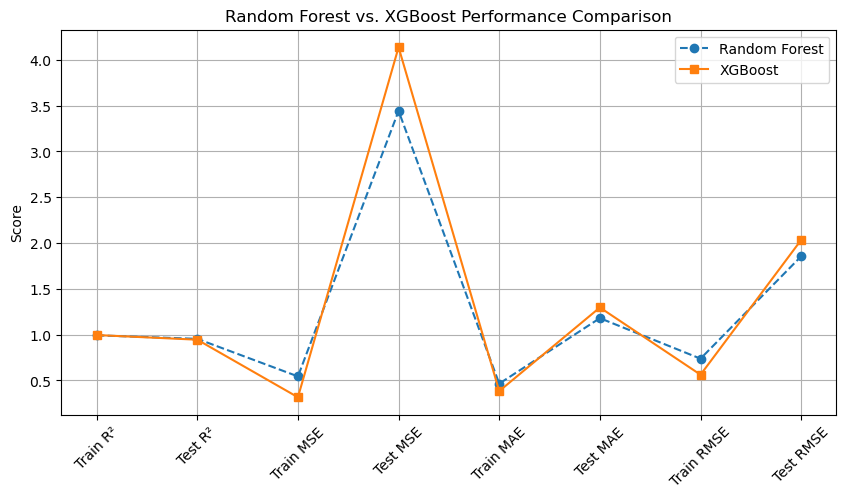

In [240]:
best_rf = RandomForestRegressor(
    max_features=None, n_estimators=300, n_jobs=-1, random_state=42
)

xgb_model = xgb.XGBRegressor(
    n_estimators=300,        
    max_depth=None,          
    learning_rate=0.05,      
    subsample=1.0,           
    colsample_bytree=1.0,    
    n_jobs=-1,               
    random_state=42
)

# Train models
best_rf.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_rf = best_rf.predict(X_train_scaled)
y_test_pred_rf = best_rf.predict(X_test_scaled)

y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation function
def evaluate_model(name, y_train, y_train_pred, y_test, y_test_pred):
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_rmse = train_mse ** 0.5
    test_rmse = test_mse ** 0.5

    return {
        "Model": name,
        "Train R²": train_r2,
        "Test R²": test_r2,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse
    }

# Evaluate models
rf_results = evaluate_model("Random Forest", y_train, y_train_pred_rf, y_test, y_test_pred_rf)
xgb_results = evaluate_model("XGBoost", y_train, y_train_pred_xgb, y_test, y_test_pred_xgb)

# Create DataFrame for comparison
results_df = pd.DataFrame([rf_results, xgb_results])

# Print results
print("===== Model Performance Comparison =====")
print(results_df)

# Plot comparison
metrics = ["Train R²", "Test R²", "Train MSE", "Test MSE", "Train MAE", "Test MAE", "Train RMSE", "Test RMSE"]
x_labels = range(len(metrics))

rf_values = [rf_results[m] for m in metrics]
xgb_values = [xgb_results[m] for m in metrics]

plt.figure(figsize=(10, 5))
plt.plot(x_labels, rf_values, marker='o', label="Random Forest", linestyle='--')
plt.plot(x_labels, xgb_values, marker='s', label="XGBoost", linestyle='-')
plt.xticks(x_labels, metrics, rotation=45)
plt.ylabel("Score")
plt.title("Random Forest vs. XGBoost Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [255]:
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score

ransac = RANSACRegressor()
ransac.fit(X_train, y_train)
y_pred_ransac = ransac.predict(X_test)
print("RANSAC Test R²:", r2_score(y_test, y_pred_ransac))

RANSAC Test R²: 0.3332226421609471


In [257]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X_const = sm.add_constant(X_test)
model_sm = sm.OLS(y_test, X_const).fit()
test = het_breuschpagan(model_sm.resid, model_sm.model.exog)
print('Breusch-Pagan p-value:', test[1])

Breusch-Pagan p-value: 3.0100036853626087e-07
